# Análisis Exploratorio de Datos (EDA) - IMDB 5000 Movies
## Metodología CRISP-DM

Este notebook realiza un análisis exploratorio de datos siguiendo la metodología **CRISP-DM** (Cross Industry Standard Process for Data Mining).

### Fases de CRISP-DM:
1. **Entendimiento del Negocio** - Comprensión del contexto y objetivos
2. **Entendimiento de los Datos** - Exploración inicial de los datos
3. **Preparación de los Datos** - Limpieza y transformación
4. **Modelado** - (No aplicable para EDA puro)
5. **Evaluación** - Análisis de resultados
6. **Despliegue** - Conclusiones y recomendaciones

---
## 1. Entendimiento del Negocio

### 1.1 Contexto de la Industria Cinematográfica

La industria del cine es un negocio multimillonario donde **las decisiones informadas por datos** pueden significar la diferencia entre un éxito de taquilla y una pérdida financiera catastrófica. 

Con presupuestos que frecuentemente superan los **$100-300 millones USD** para producciones de alto perfil, los ejecutivos de estudios como **Warner Bros, Disney, Universal** o directores independientes necesitan entender:

- ¿Qué factores contribuyen al éxito financiero de una película?
- ¿Cómo optimizar la inversión para maximizar el retorno?
- ¿Qué géneros tienen mejor relación riesgo/beneficio?
- ¿Qué directores tienen track record de éxito consistente?

### 1.2 ¿Quién usaría este análisis?

| Rol | Preguntas Clave |
|-----|-----------------|
| **CEO/Presidente de Estudio** | ¿En qué géneros debemos invertir más? ¿Cuál es el ROI esperado? |
| **Director de Cine** | ¿Qué presupuesto necesito para competir? ¿Qué géneros tienen mejor recepción crítica? |
| **Director de Marketing** | ¿Cuáles actores atraen más audiencia? ¿Cómo correlaciona la presencia en redes sociales con el éxito? |
| **Inversionista** | ¿Qué tipo de películas son menos riesgosas? ¿Hay estacionalidad en el éxito? |
| **Productor Ejecutivo** | ¿Qué duración de película funciona mejor? ¿Qué clasificación de contenido es más rentable? |

### 1.3 Preguntas de Negocio que Responderemos

#### 💰 Perspectiva Financiera (Warner Bros, Universal, etc.)
1. **¿Cuál es la relación entre presupuesto e ingresos?** - ¿Más inversión = más ganancias?
2. **¿Qué géneros son más rentables?** - ROI por género para guiar decisiones de inversión
3. **¿Existe un "punto óptimo" de presupuesto?** - ¿Hay un rango donde el ROI es máximo?

#### 🎬 Perspectiva Creativa (Directores)
4. **¿Qué directores tienen mejor track record?** - Consistencia vs éxito puntual
5. **¿Qué duración de película recibe mejores ratings?** - ¿Las películas largas son mejor valoradas?
6. **¿Hay correlación entre calidad crítica y éxito comercial?** - Arte vs comercio

#### 📊 Perspectiva de Marketing
7. **¿Los actores famosos (más seguidores en Facebook) garantizan éxito?**
8. **¿Qué clasificación de contenido (PG, PG-13, R) es más exitosa?**
9. **¿Cómo ha evolucionado la industria a lo largo del tiempo?**

### 1.4 KPIs Clave para el Análisis

| KPI | Fórmula | Importancia |
|-----|---------|-------------|
| **ROI (Return on Investment)** | (Gross - Budget) / Budget × 100 | Mide la rentabilidad real |
| **IMDB Score Promedio** | Media de puntuaciones | Proxy de calidad percibida |
| **Tasa de Éxito** | % películas con ROI > 0 | Riesgo del género/director |
| **Presupuesto Promedio** | Media de inversión | Barrera de entrada |

### 1.5 Hipótesis de Negocio a Validar

> **H1:** Las películas con presupuestos más altos tienden a recaudar más, pero con rendimientos decrecientes.

> **H2:** Los géneros de acción/aventura tienen mejor ROI que los dramas a pesar de requerir más inversión.

> **H3:** Los directores establecidos (Steven Spielberg, Christopher Nolan) tienen mejor track record que directores nuevos.

> **H4:** Las películas clasificadas PG-13 son las más rentables por alcanzar la audiencia más amplia.

> **H5:** La presencia en redes sociales (Facebook likes) de los actores correlaciona con el éxito de taquilla.

---
## 2. Entendimiento de los Datos

### 2.1 Importación de Librerías

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings

# Configuración de visualización
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Configuración de tamaño de figuras y estilo profesional
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Paleta de colores profesional
COLORS = {
    'primary': '#2C3E50',
    'success': '#27AE60', 
    'warning': '#F39C12',
    'danger': '#E74C3C',
    'info': '#3498DB',
    'purple': '#9B59B6'
}

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


### 2.2 Carga de Datos Inicial

In [2]:
# Cargar el dataset
try:
    df = pd.read_csv('IMDB_5000_Movies.csv', encoding='utf-8')
    print("✅ Archivo cargado con codificación UTF-8")
except UnicodeDecodeError:
    try:
        df = pd.read_csv('IMDB_5000_Movies.csv', encoding='latin-1')
        print("✅ Archivo cargado con codificación Latin-1")
    except UnicodeDecodeError:
        df = pd.read_csv('IMDB_5000_Movies.csv', encoding='cp1252')
        print("✅ Archivo cargado con codificación CP1252")

print(f"\n📊 Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")

✅ Archivo cargado con codificación UTF-8

📊 Dimensiones del dataset: 3875 filas x 27 columnas


### 2.3 Vista Inicial del Dataset

In [3]:
# Primeras filas del dataset
print("📋 Primeras 5 filas del dataset:")
display(df.head())

📋 Primeras 5 filas del dataset:


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,Rob Cohen,1.00,0.05,1,1.00,Vin Diesel,1.00,1.00,Action|Crime|Thriller,Paul Walker,the fast and the furiousâ,1,1,Jordana Brewster,eighteen wheeler|illegal street racing|truck|t...,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,3.00,English,USA,PG-13,0.42,NaN,1,0.66,2.35,14000
1,Color,NaN,-1.00,-2.81,1,1.00,Philip Michael Thomas,1.00,NaN,Action|Crime|Drama|Mystery|Thriller,Don Johnson,miami viceâ,1,1,John Diehl,cult tv|detective|drugs|police|undercover,http://www.imdb.com/title/tt0086759/?ref_=fn_t...,0.00,English,USA,TV-14,0.02,NaN,1,0.77,1.33,0
2,Color,Paul Verhoeven,1.00,0.48,1,1.00,Rachel Ticotin,1.00,1.00,Action|Sci-Fi,Ronny Cox,total recallâ,1,1,Marshall Bell,ambiguous ending|false memory|implanted memory...,http://www.imdb.com/title/tt0100802/?ref_=fn_t...,1.00,English,USA,R,0.72,NaN,1,0.77,1.85,0
3,Color,John McTiernan,0.00,-0.20,1,1.00,Vladimir Kulich,1.00,1.00,Action|Adventure|History,Tony Curran,the 13th warriorâ,1,1,Clive Russell,arab|battle|combat|viking|warrior,http://www.imdb.com/title/tt0120657/?ref_=fn_t...,2.00,English,USA,R,0.94,NaN,1,0.65,2.35,0
4,Color,FrÃ©dÃ©ric Forestier,0.00,0.67,0,1.00,Santiago Segura,1.00,NaN,Adventure|Comedy|Family|Fantasy,Alain Delon,asterix at the olympic gamesâ,1,1,Vanessa Hessler,1st century b.c.|lightsaber|local blockbuster|...,http://www.imdb.com/title/tt0463872/?ref_=fn_t...,0.00,French,France,NaN,0.87,NaN,1,0.45,2.35,291


In [4]:
# Información general del dataset
print("📊 Información del Dataset:")
print("="*50)
df.info()

📊 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3863 non-null   object 
 1   director_name              3872 non-null   object 
 2   num_critic_for_reviews     3847 non-null   float64
 3   duration                   3875 non-null   float64
 4   director_facebook_likes    3875 non-null   int64  
 5   actor_3_facebook_likes     3861 non-null   float64
 6   actor_2_name               3865 non-null   object 
 7   actor_1_facebook_likes     3869 non-null   float64
 8   gross                      3261 non-null   float64
 9   genres                     3875 non-null   object 
 10  actor_1_name               3869 non-null   object 
 11  movie_title                3875 non-null   object 
 12  num_voted_users            3875 non-null   int64  
 13  cast_total_facebook_l

In [5]:
# Tipos de datos de cada columna
print("📊 Resumen de Calidad de Datos:")
print("="*60)
dtype_df = pd.DataFrame({
    'Columna': df.dtypes.index,
    'Tipo': df.dtypes.values,
    'No Nulos': df.notna().sum().values,
    'Nulos': df.isna().sum().values,
    '% Nulos': (df.isna().sum().values / len(df) * 100).round(2)
})
display(dtype_df)

📊 Resumen de Calidad de Datos:


,Columna,Tipo,No Nulos,Nulos,% Nulos
0,color,object,3863,12,0.31
1,director_name,object,3872,3,0.08
2,num_critic_for_reviews,float64,3847,28,0.72
3,duration,float64,3875,0,0.00
4,director_facebook_likes,int64,3875,0,0.00
5,actor_3_facebook_likes,float64,3861,14,0.36
6,actor_2_name,object,3865,10,0.26
7,actor_1_facebook_likes,float64,3869,6,0.15
8,gross,float64,3261,614,15.85
9,genres,object,3875,0,0.00


---
## 3. Preparación de los Datos

### 3.1 Limpieza de Problemas de Codificación

In [6]:
def fix_encoding(text):
    """Función para corregir problemas de codificación UTF-8/Latin-1"""
    if pd.isna(text):
        return text
    
    text = str(text)
    
    replacements = {
        'Ã¡': 'á', 'Ã©': 'é', 'Ã­': 'í', 'Ã³': 'ó', 'Ãº': 'ú',
        'Ã ': 'à', 'Ã¨': 'è', 'Ã¬': 'ì', 'Ã²': 'ò', 'Ã¹': 'ù',
        'Ã¢': 'â', 'Ãª': 'ê', 'Ã®': 'î', 'Ã´': 'ô', 'Ã»': 'û',
        'Ã¤': 'ä', 'Ã«': 'ë', 'Ã¯': 'ï', 'Ã¶': 'ö', 'Ã¼': 'ü',
        'Ã±': 'ñ', 'Ã§': 'ç',
        'â€™': "'", 'â€œ': '"', 'â€': '"', 'â€"': '-',
        'â': '', 'Â': '', '  ': ' ',
    }
    
    for old, new in replacements.items():
        text = text.replace(old, new)
    
    try:
        text = text.encode('latin-1').decode('utf-8')
    except (UnicodeDecodeError, UnicodeEncodeError):
        pass
    
    return text.strip()

# Aplicar limpieza
df_clean = df.copy()
text_columns = df_clean.select_dtypes(include=['object']).columns

print("🧹 Limpiando columnas de texto...")
for col in text_columns:
    df_clean[col] = df_clean[col].apply(fix_encoding)
    
print("✅ Limpieza de codificación completada")

🧹 Limpiando columnas de texto...
✅ Limpieza de codificación completada


### 3.2 Creación de Variables de Negocio

In [7]:
# Crear variables de negocio importantes
print("📊 Creando variables de análisis de negocio...")

# ROI (Return on Investment) - La métrica más importante para inversores
df_clean['roi'] = np.where(
    (df_clean['budget'].notna()) & (df_clean['budget'] > 0),
    ((df_clean['gross'] - df_clean['budget']) / df_clean['budget']) * 100,
    np.nan
)

# Ganancia neta
df_clean['profit'] = df_clean['gross'] - df_clean['budget']

# Es rentable? (ROI > 0)
df_clean['is_profitable'] = df_clean['roi'] > 0

# Categoría de presupuesto (usando np.select para evitar errores)
conditions = [
    (df_clean['budget'] > 0) & (df_clean['budget'] <= 1e6),
    (df_clean['budget'] > 1e6) & (df_clean['budget'] <= 15e6),
    (df_clean['budget'] > 15e6) & (df_clean['budget'] <= 50e6),
    (df_clean['budget'] > 50e6) & (df_clean['budget'] <= 100e6),
    (df_clean['budget'] > 100e6)
]
choices = ['Micro (<$1M)', 'Bajo ($1-15M)', 'Medio ($15-50M)', 'Alto ($50-100M)', 'Blockbuster (>$100M)']
df_clean['budget_category'] = np.select(conditions, choices, default=np.nan)
df_clean['budget_category'] = df_clean['budget_category'].replace('nan', np.nan)

# Extraer género principal (el primero)
df_clean['main_genre'] = df_clean['genres'].apply(lambda x: x.split('|')[0] if pd.notna(x) else np.nan)

# Categoría de rating IMDB (usando np.select)
conditions_rating = [
    (df_clean['imdb_score'] >= 0) & (df_clean['imdb_score'] < 4),
    (df_clean['imdb_score'] >= 4) & (df_clean['imdb_score'] < 6),
    (df_clean['imdb_score'] >= 6) & (df_clean['imdb_score'] < 7),
    (df_clean['imdb_score'] >= 7) & (df_clean['imdb_score'] < 8),
    (df_clean['imdb_score'] >= 8)
]
choices_rating = ['Muy Mala (0-4)', 'Mala (4-6)', 'Aceptable (6-7)', 'Buena (7-8)', 'Excelente (8-10)']
df_clean['rating_category'] = np.select(conditions_rating, choices_rating, default=np.nan)

print("✅ Variables de negocio creadas:")
print("   - roi: Retorno sobre la inversión (%)")
print("   - profit: Ganancia neta (USD)")
print("   - is_profitable: ¿Es rentable?")
print("   - budget_category: Categoría de presupuesto")
print("   - main_genre: Género principal")
print("   - rating_category: Categoría de rating")

📊 Creando variables de análisis de negocio...

✅ Variables de negocio creadas:
   - roi: Retorno sobre la inversión (%)
   - profit: Ganancia neta (USD)
   - is_profitable: ¿Es rentable?
   - budget_category: Categoría de presupuesto
   - main_genre: Género principal
   - rating_category: Categoría de rating


In [8]:
# Eliminar duplicados
registros_antes = len(df_clean)
df_clean = df_clean.drop_duplicates()
registros_despues = len(df_clean)
print(f"📊 Registros eliminados por duplicados: {registros_antes - registros_despues}")
print(f"📊 Registros actuales: {registros_despues}")

📊 Registros eliminados por duplicados: 43
📊 Registros actuales: 3832


---
## 4. Análisis Exploratorio Orientado al Negocio

### 4.1 📊 Vista General del Mercado

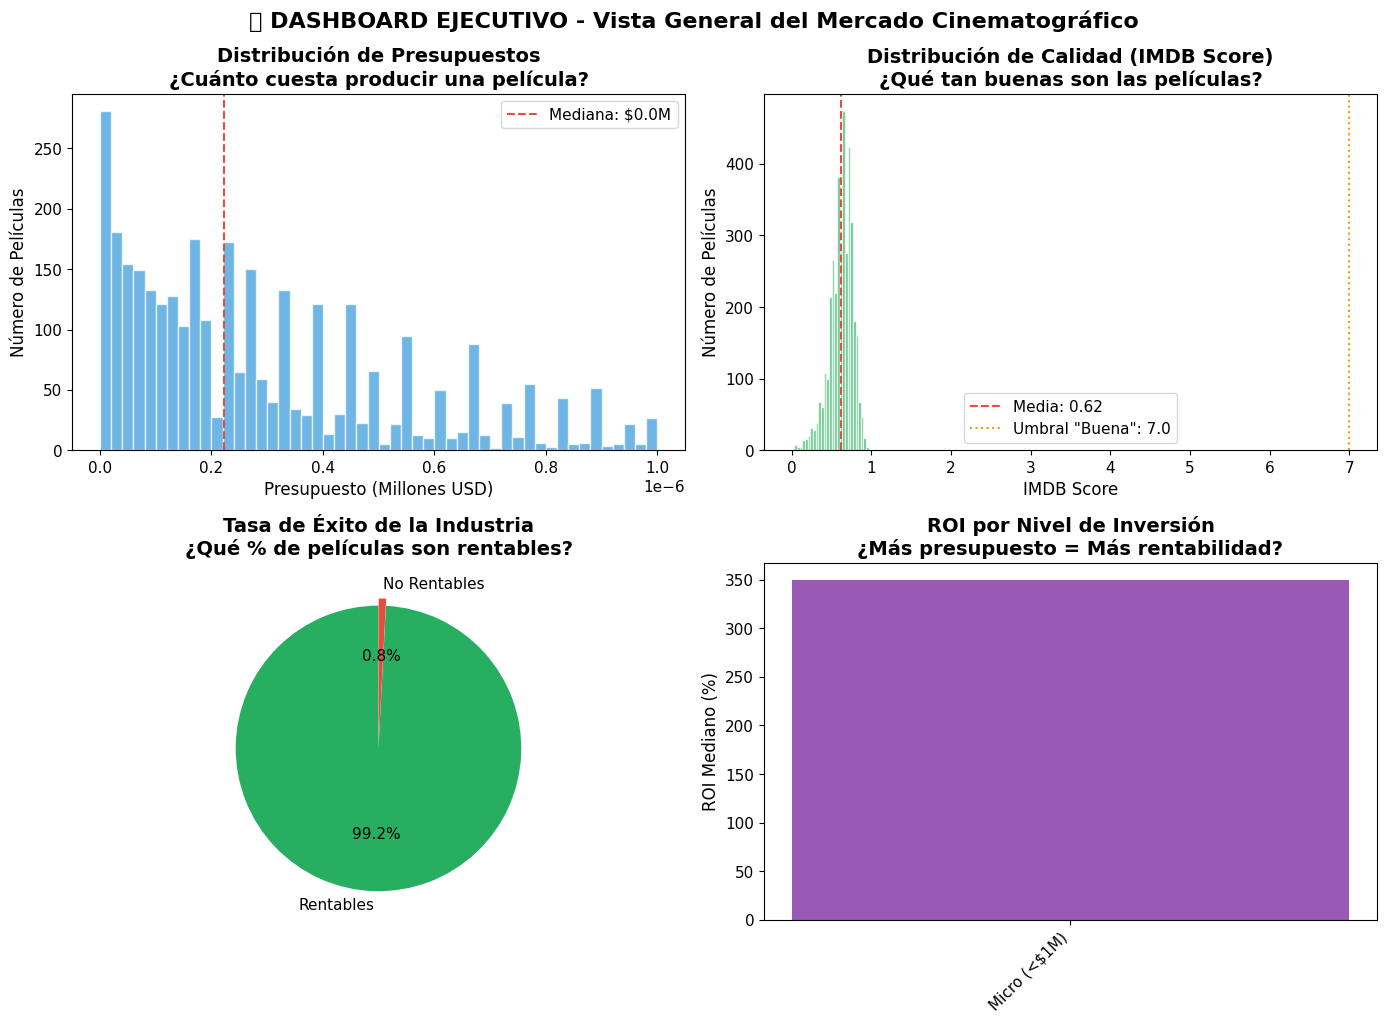

In [9]:
# Dashboard resumen ejecutivo
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Filtrar datos válidos
valid_data = df_clean[(df_clean['budget'].notna()) & (df_clean['gross'].notna()) & 
                       (df_clean['budget'] > 0) & (df_clean['gross'] > 0)]

# 1. Distribución de presupuestos (log scale)
ax1 = axes[0, 0]
budget_millions = valid_data['budget'] / 1e6
ax1.hist(budget_millions, bins=50, color=COLORS['info'], edgecolor='white', alpha=0.7)
ax1.set_xlabel('Presupuesto (Millones USD)')
ax1.set_ylabel('Número de Películas')
ax1.set_title('Distribución de Presupuestos\n¿Cuánto cuesta producir una película?', fontweight='bold')
ax1.axvline(budget_millions.median(), color=COLORS['danger'], linestyle='--', 
            label=f'Mediana: ${budget_millions.median():.1f}M')
ax1.legend()

# 2. Distribución de IMDB Score
ax2 = axes[0, 1]
imdb_data = df_clean['imdb_score'].dropna()
ax2.hist(imdb_data, bins=30, color=COLORS['success'], edgecolor='white', alpha=0.7)
ax2.set_xlabel('IMDB Score')
ax2.set_ylabel('Número de Películas')
ax2.set_title('Distribución de Calidad (IMDB Score)\n¿Qué tan buenas son las películas?', fontweight='bold')
ax2.axvline(imdb_data.mean(), color=COLORS['danger'], linestyle='--', 
            label=f'Media: {imdb_data.mean():.2f}')
ax2.axvline(7.0, color=COLORS['warning'], linestyle=':', label='Umbral "Buena": 7.0')
ax2.legend()

# 3. Tasa de rentabilidad general
ax3 = axes[1, 0]
profitable_count = valid_data['is_profitable'].sum()
unprofitable_count = len(valid_data) - profitable_count
colors_pie = [COLORS['success'], COLORS['danger']]
wedges, texts, autotexts = ax3.pie(
    [profitable_count, unprofitable_count],
    labels=['Rentables', 'No Rentables'],
    autopct='%1.1f%%',
    colors=colors_pie,
    explode=(0.05, 0),
    startangle=90
)
ax3.set_title('Tasa de Éxito de la Industria\n¿Qué % de películas son rentables?', fontweight='bold')

# 4. ROI promedio por categoría de presupuesto
ax4 = axes[1, 1]
roi_by_budget = valid_data.groupby('budget_category')['roi'].median().dropna()
colors_bar = [COLORS['purple'], COLORS['info'], COLORS['success'], COLORS['warning'], COLORS['danger']]
bars = ax4.bar(range(len(roi_by_budget)), roi_by_budget.values, color=colors_bar[:len(roi_by_budget)])
ax4.set_xticks(range(len(roi_by_budget)))
ax4.set_xticklabels(roi_by_budget.index, rotation=45, ha='right')
ax4.set_ylabel('ROI Mediano (%)')
ax4.set_title('ROI por Nivel de Inversión\n¿Más presupuesto = Más rentabilidad?', fontweight='bold')
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.suptitle('📊 DASHBOARD EJECUTIVO - Vista General del Mercado Cinematográfico', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

### 4.2 💰 Análisis de Rentabilidad por Género
> **Pregunta de Negocio:** ¿En qué géneros debería invertir Warner Bros para maximizar el ROI?

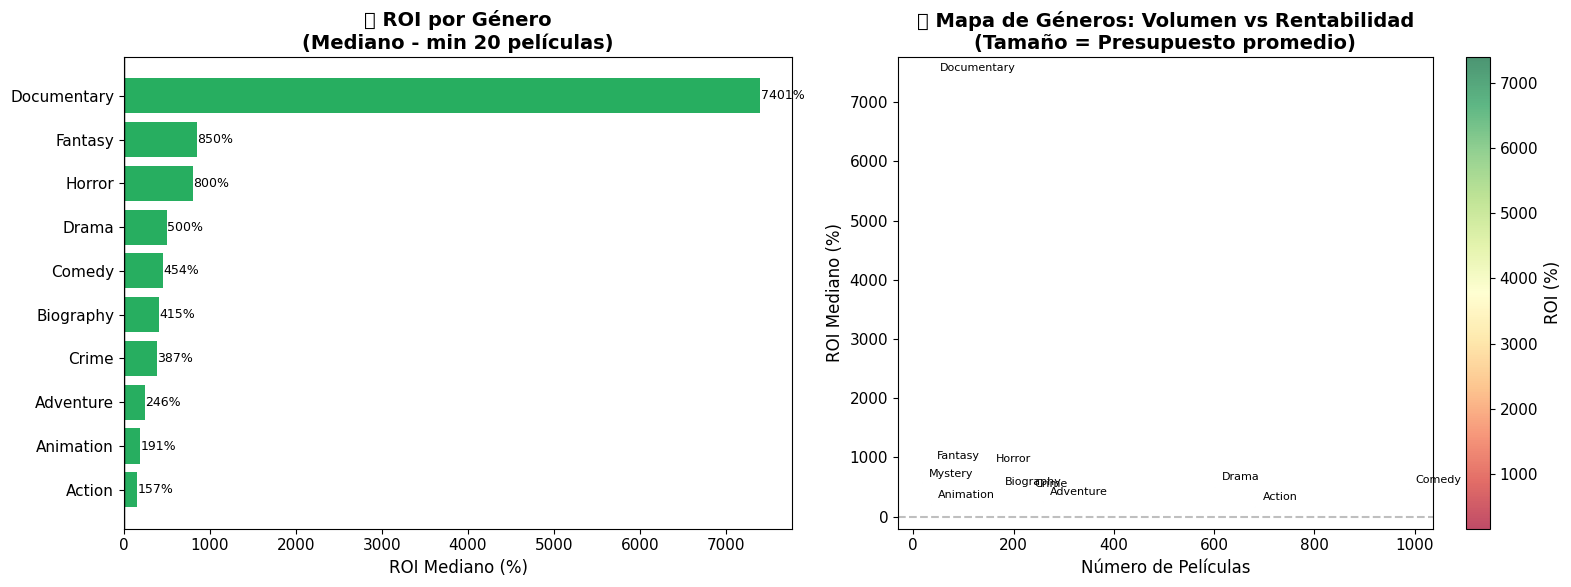


💡 INSIGHT PARA WARNER BROS:
   • El género más rentable es: Documentary (ROI: 7401%)
   • Géneros con ROI negativo deben evaluarse cuidadosamente


In [10]:
# Análisis de ROI por género - Clave para decisiones de inversión
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Filtrar datos válidos para ROI
roi_data = df_clean[(df_clean['roi'].notna()) & (df_clean['main_genre'].notna())]

# 1. ROI mediano por género
ax1 = axes[0]
roi_by_genre = roi_data.groupby('main_genre').agg({
    'roi': 'median',
    'movie_title': 'count'
}).rename(columns={'movie_title': 'count'})
roi_by_genre = roi_by_genre[roi_by_genre['count'] >= 20]  # Mínimo 20 películas
roi_by_genre = roi_by_genre.sort_values('roi', ascending=True)

colors = [COLORS['success'] if x > 0 else COLORS['danger'] for x in roi_by_genre['roi']]
bars = ax1.barh(roi_by_genre.index, roi_by_genre['roi'], color=colors)
ax1.set_xlabel('ROI Mediano (%)')
ax1.set_title('💰 ROI por Género\n(Mediano - min 20 películas)', fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='-', linewidth=1)

# Añadir valores
for bar, val in zip(bars, roi_by_genre['roi']):
    ax1.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
             f'{val:.0f}%', va='center', fontsize=9)

# 2. Relación cantidad vs ROI (bubble chart)
ax2 = axes[1]
genre_analysis = roi_data.groupby('main_genre').agg({
    'roi': 'median',
    'movie_title': 'count',
    'budget': 'median'
}).rename(columns={'movie_title': 'count', 'budget': 'avg_budget'})
genre_analysis = genre_analysis[genre_analysis['count'] >= 10]

scatter = ax2.scatter(
    genre_analysis['count'],
    genre_analysis['roi'],
    s=genre_analysis['avg_budget'] / 1e5,  # Tamaño proporcional al presupuesto
    c=genre_analysis['roi'],
    cmap='RdYlGn',
    alpha=0.7,
    edgecolors='black'
)

# Añadir etiquetas
for idx, row in genre_analysis.iterrows():
    ax2.annotate(idx, (row['count'], row['roi']), fontsize=8, 
                 xytext=(5, 5), textcoords='offset points')

ax2.set_xlabel('Número de Películas')
ax2.set_ylabel('ROI Mediano (%)')
ax2.set_title('📊 Mapa de Géneros: Volumen vs Rentabilidad\n(Tamaño = Presupuesto promedio)', fontweight='bold')
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

plt.colorbar(scatter, ax=ax2, label='ROI (%)')
plt.tight_layout()
plt.show()

print("\n💡 INSIGHT PARA WARNER BROS:")
print("=" * 60)
top_roi_genre = roi_by_genre['roi'].idxmax()
print(f"   • El género más rentable es: {top_roi_genre} (ROI: {roi_by_genre.loc[top_roi_genre, 'roi']:.0f}%)")
print(f"   • Géneros con ROI negativo deben evaluarse cuidadosamente")

### 4.3 🎬 Análisis de Directores
> **Pregunta de Negocio:** ¿Qué directores tienen el mejor track record para confiarles un proyecto?

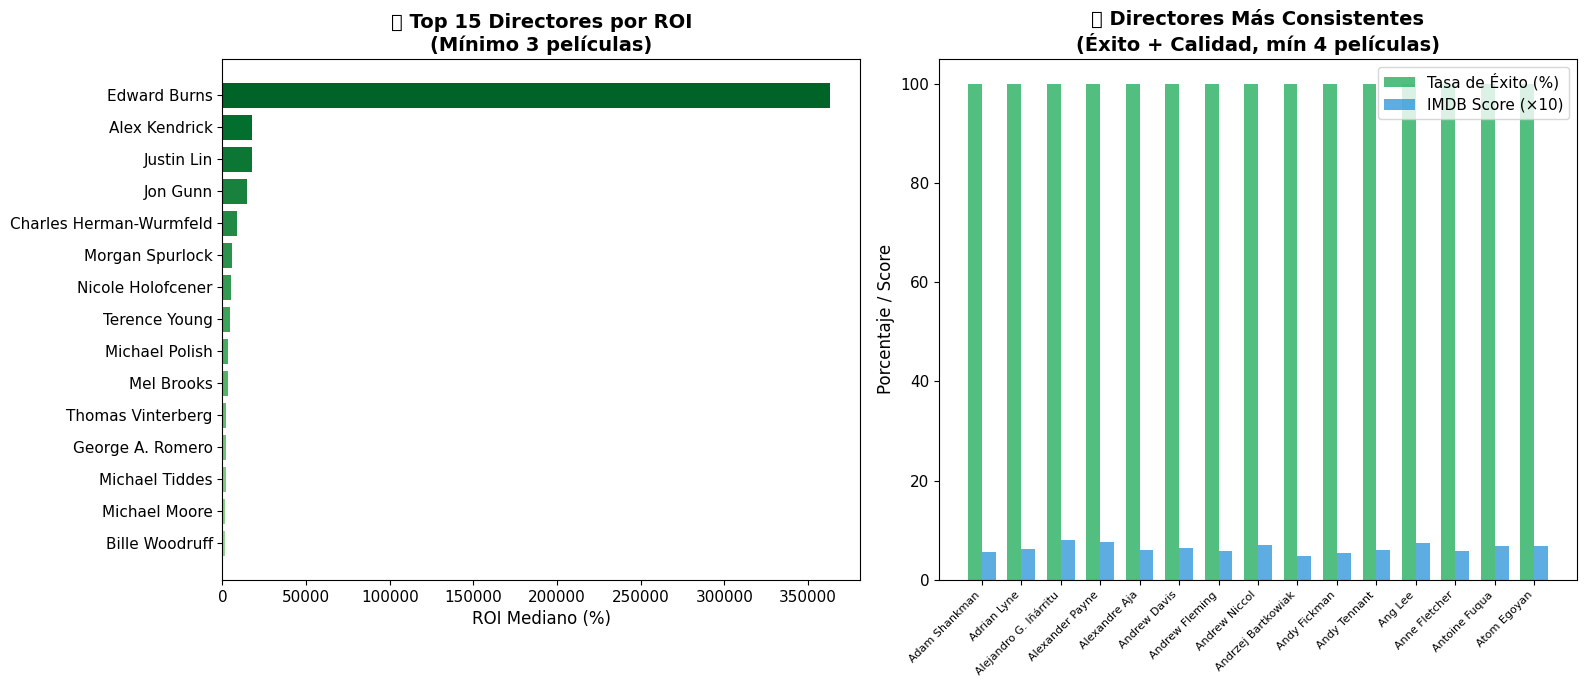


💡 RECOMENDACIÓN PARA INVERSORES:
   • Director más confiable: Adam Shankman
     - Tasa de éxito: 100%
     - IMDB promedio: 0.6
     - Películas: 8


In [11]:
# Análisis de directores - ¿A quién confiar un proyecto de $100M?
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Filtrar directores con datos de ROI
director_data = df_clean[(df_clean['roi'].notna()) & (df_clean['director_name'].notna())]

# Análisis de directores con mínimo 3 películas
director_analysis = director_data.groupby('director_name').agg({
    'roi': ['median', 'mean', 'count'],
    'imdb_score': 'mean',
    'gross': 'sum',
    'budget': 'sum'
}).round(2)
director_analysis.columns = ['roi_median', 'roi_mean', 'num_movies', 'avg_imdb', 'total_gross', 'total_budget']
director_analysis = director_analysis[director_analysis['num_movies'] >= 3]
director_analysis['success_rate'] = (director_data.groupby('director_name')['is_profitable'].mean() * 100).round(1)

# 1. Top directores por ROI (con mínimo 3 películas)
ax1 = axes[0]
top_roi_directors = director_analysis.nlargest(15, 'roi_median')
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(top_roi_directors)))
bars = ax1.barh(top_roi_directors.index[::-1], top_roi_directors['roi_median'][::-1], color=colors)
ax1.set_xlabel('ROI Mediano (%)')
ax1.set_title('🏆 Top 15 Directores por ROI\n(Mínimo 3 películas)', fontweight='bold')

# 2. Directores más consistentes (alto ROI + alta tasa de éxito)
ax2 = axes[1]
# Filtrar directores con buen track record
reliable_directors = director_analysis[
    (director_analysis['num_movies'] >= 4) & 
    (director_analysis['success_rate'] >= 50)
].nlargest(15, 'success_rate')

# Crear gráfico de barras agrupadas
x = np.arange(len(reliable_directors))
width = 0.35

bars1 = ax2.bar(x - width/2, reliable_directors['success_rate'], width, 
                label='Tasa de Éxito (%)', color=COLORS['success'], alpha=0.8)
bars2 = ax2.bar(x + width/2, reliable_directors['avg_imdb'] * 10, width, 
                label='IMDB Score (×10)', color=COLORS['info'], alpha=0.8)

ax2.set_xticks(x)
ax2.set_xticklabels(reliable_directors.index, rotation=45, ha='right', fontsize=8)
ax2.set_ylabel('Porcentaje / Score')
ax2.set_title('🎯 Directores Más Consistentes\n(Éxito + Calidad, mín 4 películas)', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n💡 RECOMENDACIÓN PARA INVERSORES:")
print("=" * 60)
if len(reliable_directors) > 0:
    best_director = reliable_directors.iloc[0]
    print(f"   • Director más confiable: {reliable_directors.index[0]}")
    print(f"     - Tasa de éxito: {best_director['success_rate']:.0f}%")
    print(f"     - IMDB promedio: {best_director['avg_imdb']:.1f}")
    print(f"     - Películas: {int(best_director['num_movies'])}")

### 4.4 📈 Relación Presupuesto vs Éxito
> **Pregunta de Negocio:** ¿Más inversión garantiza más éxito? ¿Cuál es el punto óptimo?

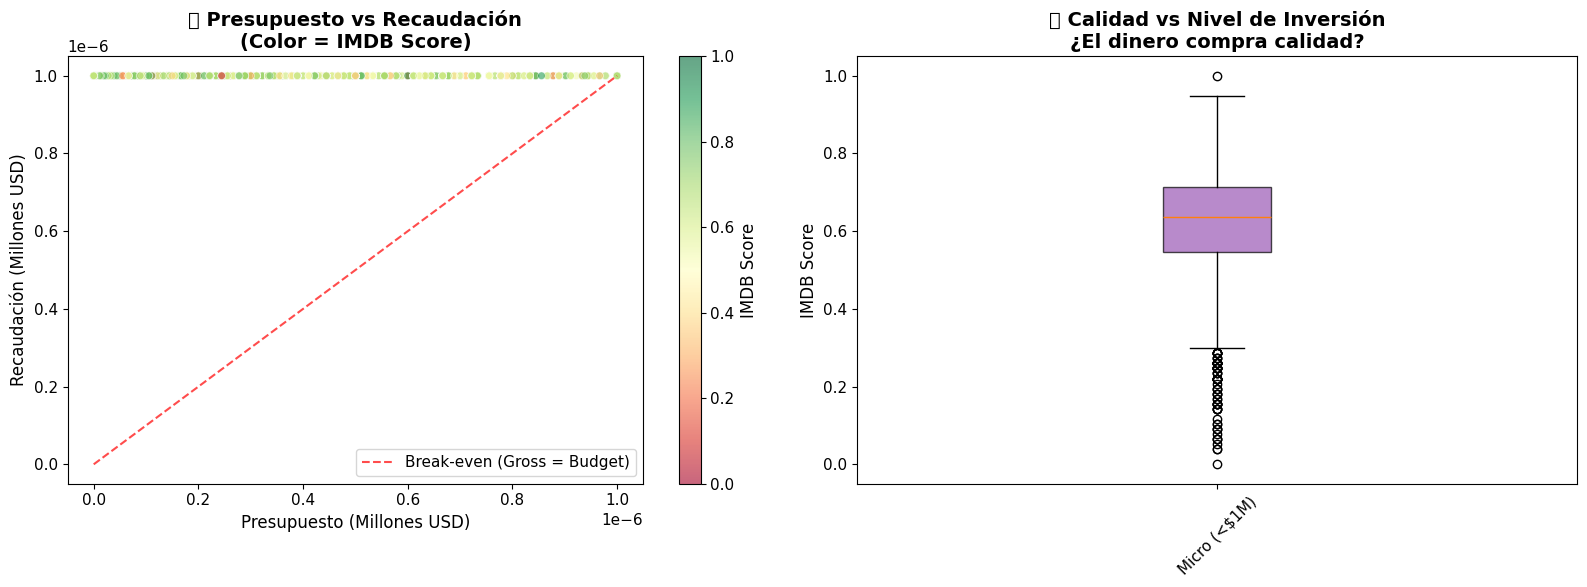


💡 INSIGHT CLAVE:
   • Correlación Presupuesto-Recaudación: nan
   • Interpretación: Débil relación positiva
   • Correlación Presupuesto-Calidad: -0.09
   • Interpretación: El dinero NO garantiza calidad


In [12]:
# Análisis de la relación presupuesto-éxito
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Datos válidos
valid_data = df_clean[(df_clean['budget'].notna()) & (df_clean['gross'].notna()) & 
                       (df_clean['budget'] > 0) & (df_clean['gross'] > 0) &
                       (df_clean['imdb_score'].notna())]

# 1. Scatter: Presupuesto vs Recaudación (coloreado por rating)
ax1 = axes[0]
scatter = ax1.scatter(
    valid_data['budget'] / 1e6,
    valid_data['gross'] / 1e6,
    c=valid_data['imdb_score'],
    cmap='RdYlGn',
    alpha=0.6,
    s=30,
    edgecolors='white',
    linewidth=0.5
)

# Línea de break-even (donde gross = budget)
max_val = max(valid_data['budget'].max(), valid_data['gross'].max()) / 1e6
ax1.plot([0, max_val], [0, max_val], 'r--', label='Break-even (Gross = Budget)', alpha=0.7)

ax1.set_xlabel('Presupuesto (Millones USD)')
ax1.set_ylabel('Recaudación (Millones USD)')
ax1.set_title('💰 Presupuesto vs Recaudación\n(Color = IMDB Score)', fontweight='bold')
ax1.legend()
plt.colorbar(scatter, ax=ax1, label='IMDB Score')

# 2. Box plot: IMDB Score por categoría de presupuesto
ax2 = axes[1]
budget_score_data = valid_data[valid_data['budget_category'].notna()]

# Crear boxplot
categories = ['Micro (<$1M)', 'Bajo ($1-15M)', 'Medio ($15-50M)', 'Alto ($50-100M)', 'Blockbuster (>$100M)']
box_data = [budget_score_data[budget_score_data['budget_category'] == cat]['imdb_score'].dropna() 
            for cat in categories if cat in budget_score_data['budget_category'].values]
valid_cats = [cat for cat in categories if cat in budget_score_data['budget_category'].values]

bp = ax2.boxplot(box_data, labels=valid_cats, patch_artist=True)
colors_box = [COLORS['purple'], COLORS['info'], COLORS['success'], COLORS['warning'], COLORS['danger']]
for patch, color in zip(bp['boxes'], colors_box[:len(bp['boxes'])]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_ylabel('IMDB Score')
ax2.set_title('🎯 Calidad vs Nivel de Inversión\n¿El dinero compra calidad?', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n💡 INSIGHT CLAVE:")
print("=" * 60)
# Calcular correlación
corr = valid_data['budget'].corr(valid_data['gross'])
print(f"   • Correlación Presupuesto-Recaudación: {corr:.2f}")
print(f"   • Interpretación: {'Fuerte' if abs(corr) > 0.5 else 'Moderada' if abs(corr) > 0.3 else 'Débil'} relación positiva")

corr_quality = valid_data['budget'].corr(valid_data['imdb_score'])
print(f"   • Correlación Presupuesto-Calidad: {corr_quality:.2f}")
print(f"   • Interpretación: El dinero {'SÍ' if corr_quality > 0.1 else 'NO'} garantiza calidad")

### 4.5 ⭐ Impacto de los Actores Famosos
> **Pregunta de Negocio:** ¿Contratar actores famosos (con muchos seguidores) garantiza éxito?

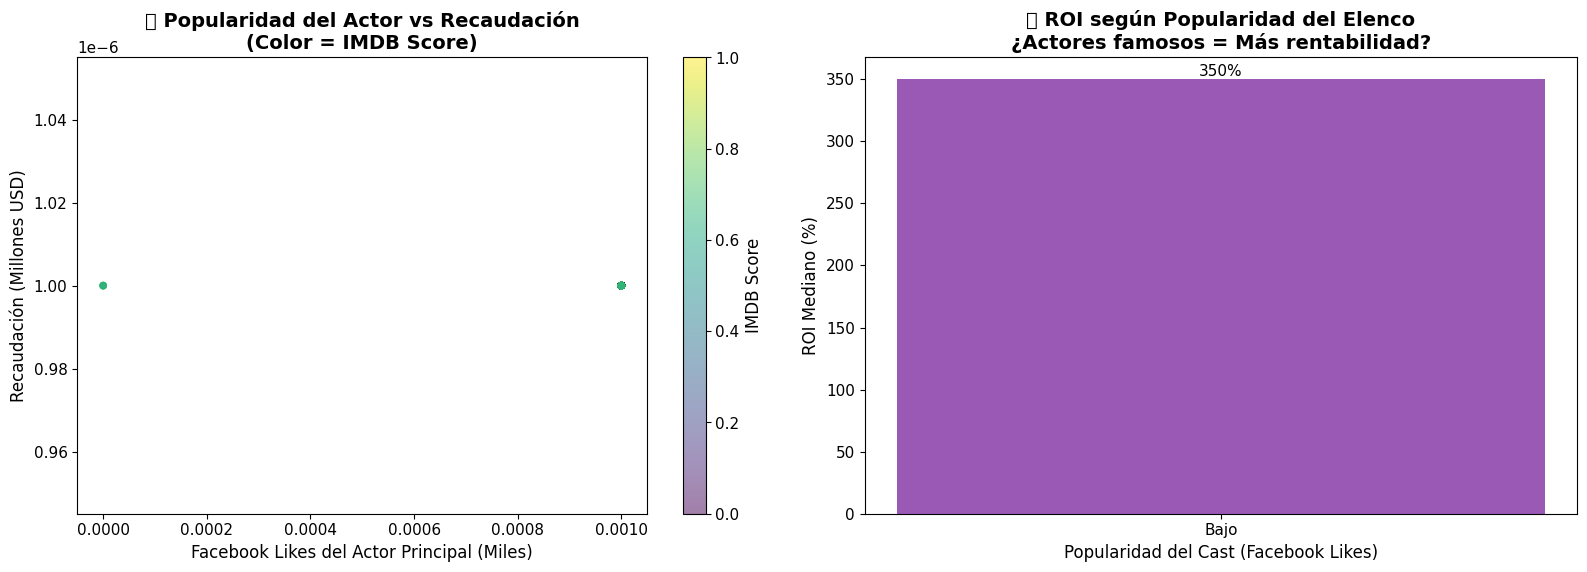


💡 INSIGHT PARA CASTING:
   • Correlación Popularidad Actor - Recaudación: nan
   • Conclusión: La fama del actor tiene poco impacto en la taquilla


In [13]:
# Análisis del impacto de la popularidad de actores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Datos válidos
actor_data = df_clean[(df_clean['actor_1_facebook_likes'].notna()) & 
                       (df_clean['gross'].notna()) & (df_clean['gross'] > 0)]

# 1. Popularidad del actor principal vs Recaudación
ax1 = axes[0]
scatter = ax1.scatter(
    actor_data['actor_1_facebook_likes'] / 1000,
    actor_data['gross'] / 1e6,
    c=actor_data['imdb_score'],
    cmap='viridis',
    alpha=0.5,
    s=20
)
ax1.set_xlabel('Facebook Likes del Actor Principal (Miles)')
ax1.set_ylabel('Recaudación (Millones USD)')
ax1.set_title('👤 Popularidad del Actor vs Recaudación\n(Color = IMDB Score)', fontweight='bold')
plt.colorbar(scatter, ax=ax1, label='IMDB Score')

# 2. Facebook Likes totales del cast vs ROI
ax2 = axes[1]
cast_data = df_clean[(df_clean['cast_total_facebook_likes'].notna()) & (df_clean['roi'].notna())].copy()

# Crear categorías de popularidad usando cuartiles manuales
q1 = cast_data['cast_total_facebook_likes'].quantile(0.25)
q2 = cast_data['cast_total_facebook_likes'].quantile(0.50)
q3 = cast_data['cast_total_facebook_likes'].quantile(0.75)

def assign_popularity(x):
    if x <= q1:
        return 'Bajo'
    elif x <= q2:
        return 'Medio-Bajo'
    elif x <= q3:
        return 'Medio-Alto'
    else:
        return 'Alto'

cast_data['cast_popularity'] = cast_data['cast_total_facebook_likes'].apply(assign_popularity)

roi_by_popularity = cast_data.groupby('cast_popularity')['roi'].median()
# Ordenar las categorías
order = ['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto']
roi_by_popularity = roi_by_popularity.reindex([o for o in order if o in roi_by_popularity.index])

colors = [COLORS['purple'], COLORS['info'], COLORS['success'], COLORS['warning']][:len(roi_by_popularity)]
bars = ax2.bar(roi_by_popularity.index, roi_by_popularity.values, color=colors)
ax2.set_xlabel('Popularidad del Cast (Facebook Likes)')
ax2.set_ylabel('ROI Mediano (%)')
ax2.set_title('📊 ROI según Popularidad del Elenco\n¿Actores famosos = Más rentabilidad?', fontweight='bold')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}%', ha='center', va='bottom' if height > 0 else 'top')

plt.tight_layout()
plt.show()

print("\n💡 INSIGHT PARA CASTING:")
print("=" * 60)
corr_actor = actor_data['actor_1_facebook_likes'].corr(actor_data['gross'])
print(f"   • Correlación Popularidad Actor - Recaudación: {corr_actor:.2f}")
print(f"   • Conclusión: La fama del actor tiene {'impacto positivo' if corr_actor > 0.1 else 'poco impacto'} en la taquilla")

### 4.6 🎭 Clasificación de Contenido y Audiencia
> **Pregunta de Negocio:** ¿Qué clasificación (G, PG, PG-13, R) es más rentable?

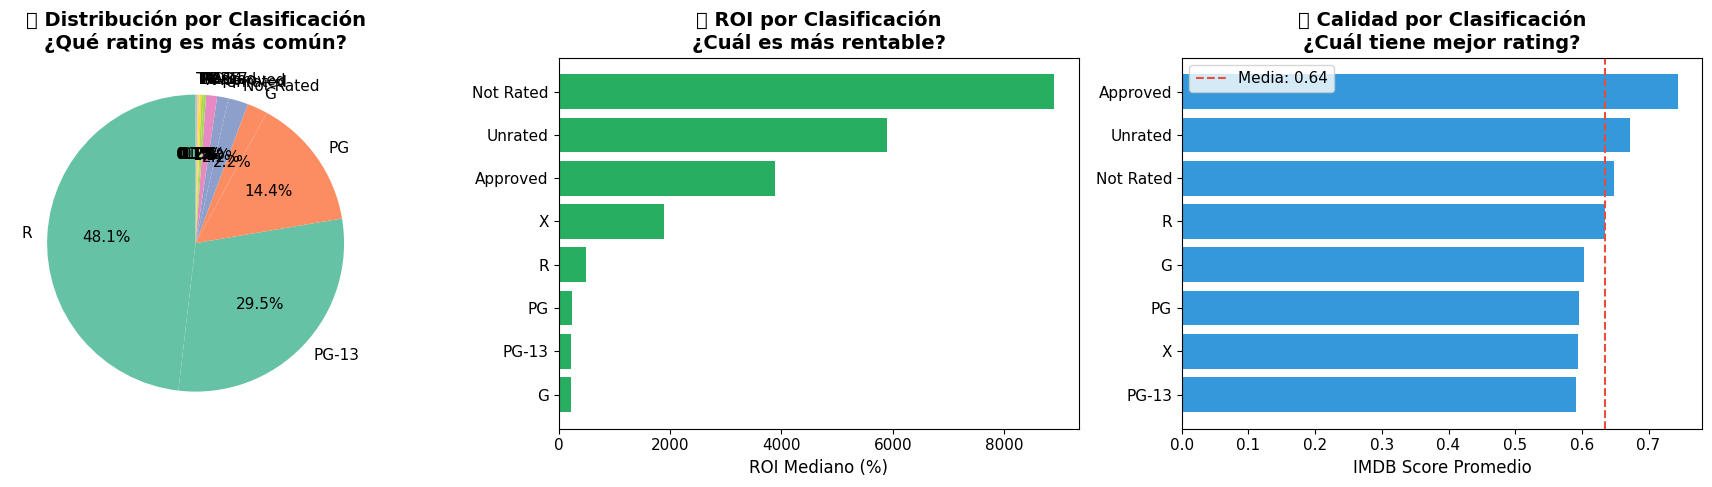


💡 RECOMENDACIÓN PARA PRODUCCIÓN:
   • Clasificación más rentable: Not Rated (ROI: 8902%)
   • PG-13 suele ser el 'sweet spot' por alcanzar la audiencia más amplia


In [14]:
# Análisis por clasificación de contenido
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

rating_data = df_clean[df_clean['content_rating'].notna()]

# 1. Distribución de películas por clasificación
ax1 = axes[0]
rating_counts = rating_data['content_rating'].value_counts()
colors = plt.cm.Set2(np.linspace(0, 1, len(rating_counts)))
ax1.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax1.set_title('📊 Distribución por Clasificación\n¿Qué rating es más común?', fontweight='bold')

# 2. ROI por clasificación
ax2 = axes[1]
roi_by_rating = rating_data.groupby('content_rating').agg({
    'roi': 'median',
    'movie_title': 'count'
}).rename(columns={'movie_title': 'count'})
roi_by_rating = roi_by_rating[roi_by_rating['count'] >= 10].sort_values('roi', ascending=True)

colors = [COLORS['success'] if x > 0 else COLORS['danger'] for x in roi_by_rating['roi']]
bars = ax2.barh(roi_by_rating.index, roi_by_rating['roi'], color=colors)
ax2.set_xlabel('ROI Mediano (%)')
ax2.set_title('💰 ROI por Clasificación\n¿Cuál es más rentable?', fontweight='bold')
ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# 3. IMDB Score por clasificación
ax3 = axes[2]
imdb_by_rating = rating_data.groupby('content_rating')['imdb_score'].mean().sort_values(ascending=True)
imdb_by_rating = imdb_by_rating[imdb_by_rating.index.isin(roi_by_rating.index)]
bars = ax3.barh(imdb_by_rating.index, imdb_by_rating.values, color=COLORS['info'])
ax3.set_xlabel('IMDB Score Promedio')
ax3.set_title('⭐ Calidad por Clasificación\n¿Cuál tiene mejor rating?', fontweight='bold')
ax3.axvline(x=imdb_by_rating.mean(), color=COLORS['danger'], linestyle='--', 
            label=f'Media: {imdb_by_rating.mean():.2f}')
ax3.legend()

plt.tight_layout()
plt.show()

print("\n💡 RECOMENDACIÓN PARA PRODUCCIÓN:")
print("=" * 60)
if len(roi_by_rating) > 0:
    best_rating = roi_by_rating['roi'].idxmax()
    print(f"   • Clasificación más rentable: {best_rating} (ROI: {roi_by_rating.loc[best_rating, 'roi']:.0f}%)")
    print("   • PG-13 suele ser el 'sweet spot' por alcanzar la audiencia más amplia")

### 4.7 📅 Evolución Temporal de la Industria
> **Pregunta de Negocio:** ¿Cómo ha evolucionado la industria a lo largo del tiempo?

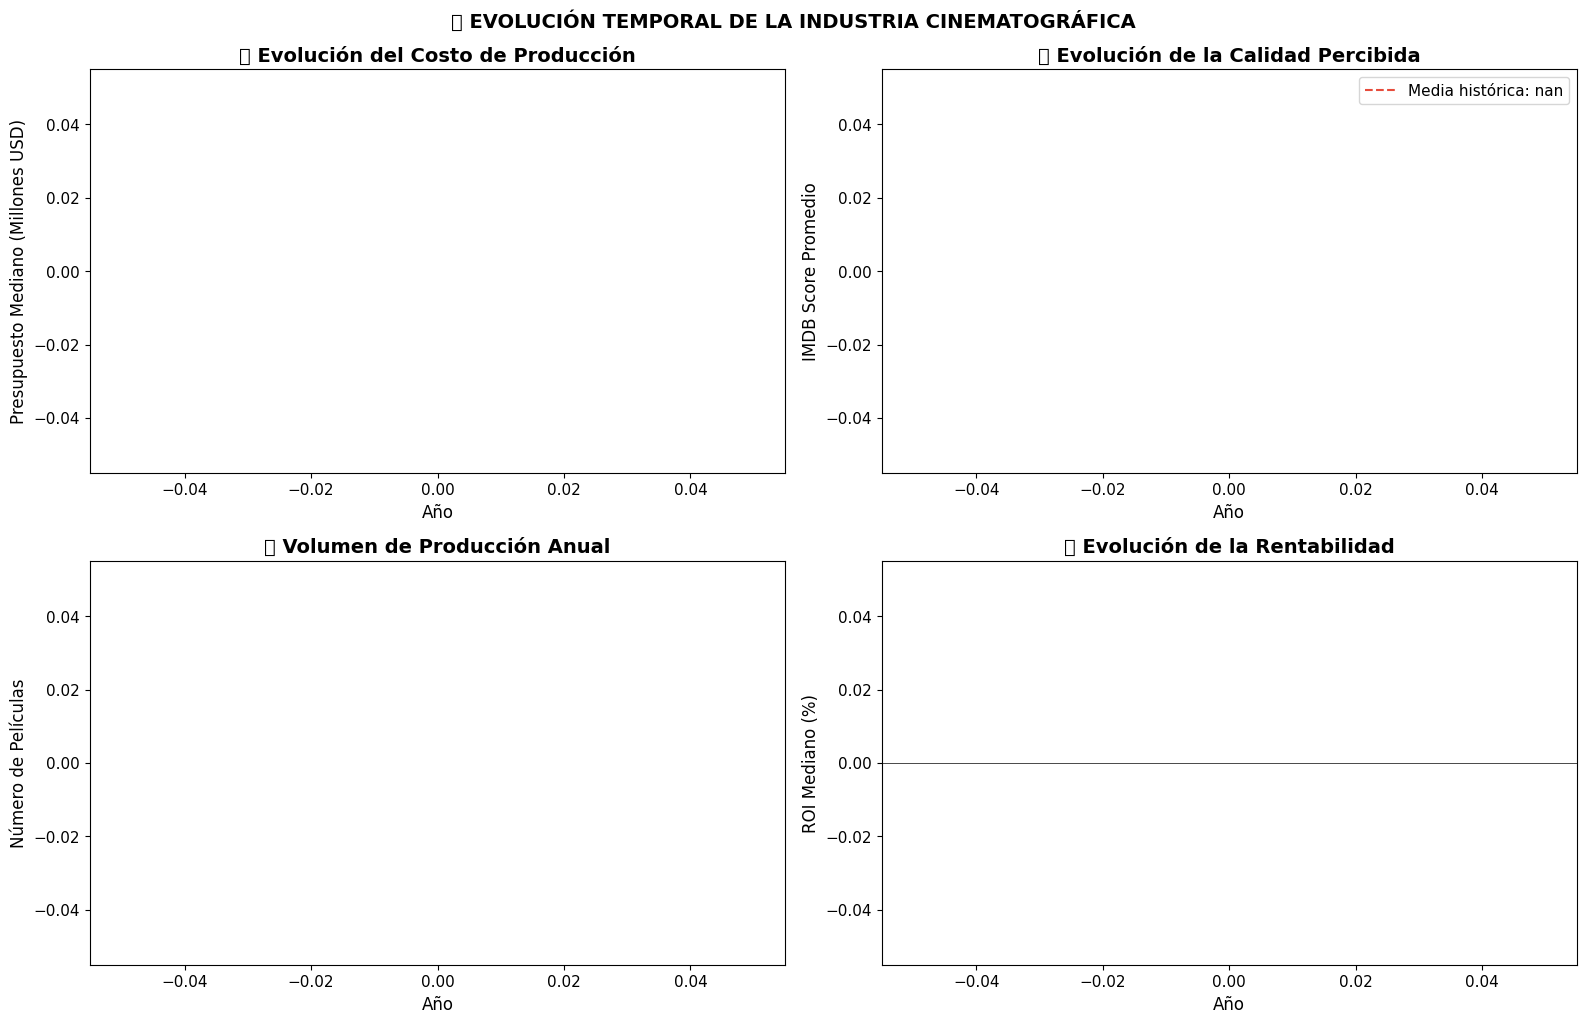

In [15]:
# Análisis temporal
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Filtrar años válidos
time_data = df_clean[df_clean['title_year'].notna()].copy()
time_data['title_year'] = time_data['title_year'].astype(int)
time_data = time_data[time_data['title_year'] >= 1980]  # Desde 1980

# 1. Evolución del presupuesto promedio
ax1 = axes[0, 0]
budget_by_year = time_data.groupby('title_year')['budget'].median() / 1e6
ax1.fill_between(budget_by_year.index, budget_by_year.values, alpha=0.3, color=COLORS['info'])
ax1.plot(budget_by_year.index, budget_by_year.values, color=COLORS['info'], linewidth=2)
ax1.set_xlabel('Año')
ax1.set_ylabel('Presupuesto Mediano (Millones USD)')
ax1.set_title('📈 Evolución del Costo de Producción', fontweight='bold')

# 2. Evolución del IMDB Score
ax2 = axes[0, 1]
imdb_by_year = time_data.groupby('title_year')['imdb_score'].mean()
ax2.plot(imdb_by_year.index, imdb_by_year.values, color=COLORS['success'], linewidth=2, marker='o', markersize=3)
ax2.set_xlabel('Año')
ax2.set_ylabel('IMDB Score Promedio')
ax2.set_title('⭐ Evolución de la Calidad Percibida', fontweight='bold')
ax2.axhline(y=imdb_by_year.mean(), color=COLORS['danger'], linestyle='--', 
            label=f'Media histórica: {imdb_by_year.mean():.2f}')
ax2.legend()

# 3. Número de películas por año
ax3 = axes[1, 0]
movies_by_year = time_data.groupby('title_year').size()
ax3.bar(movies_by_year.index, movies_by_year.values, color=COLORS['purple'], alpha=0.7)
ax3.set_xlabel('Año')
ax3.set_ylabel('Número de Películas')
ax3.set_title('🎬 Volumen de Producción Anual', fontweight='bold')

# 4. Evolución del ROI
ax4 = axes[1, 1]
roi_by_year = time_data[time_data['roi'].notna()].groupby('title_year')['roi'].median()
colors = [COLORS['success'] if x > 0 else COLORS['danger'] for x in roi_by_year.values]
ax4.bar(roi_by_year.index, roi_by_year.values, color=colors, alpha=0.7)
ax4.set_xlabel('Año')
ax4.set_ylabel('ROI Mediano (%)')
ax4.set_title('💰 Evolución de la Rentabilidad', fontweight='bold')
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.suptitle('📅 EVOLUCIÓN TEMPORAL DE LA INDUSTRIA CINEMATOGRÁFICA', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

### 4.8 🔗 Matriz de Correlaciones

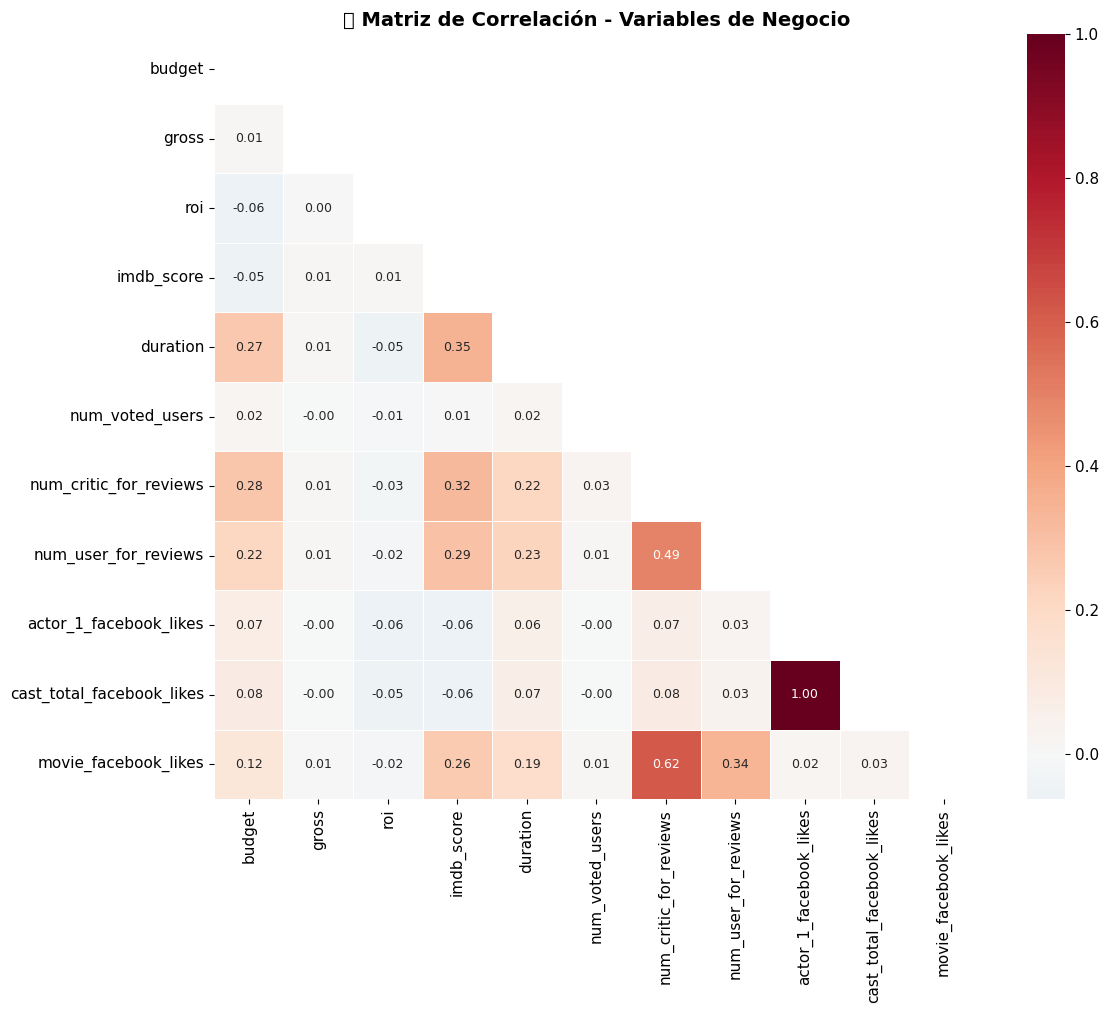


💡 CORRELACIONES CLAVE:
   • Budget ↔ Gross: 0.01 (Mayor inversión → Mayor recaudación)
   • IMDB Score ↔ Gross: 0.01 (Calidad → Taquilla)
   • Num Voted Users ↔ Gross: -0.00 (Popularidad → Taquilla)


In [16]:
# Matriz de correlación con las variables más relevantes para el negocio
fig, ax = plt.subplots(figsize=(12, 10))

# Seleccionar variables de negocio
business_cols = ['budget', 'gross', 'roi', 'imdb_score', 'duration', 
                 'num_voted_users', 'num_critic_for_reviews', 'num_user_for_reviews',
                 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes']

business_cols = [col for col in business_cols if col in df_clean.columns]
corr_matrix = df_clean[business_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5, ax=ax,
            annot_kws={'size': 9})
ax.set_title('🔗 Matriz de Correlación - Variables de Negocio', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 CORRELACIONES CLAVE:")
print("=" * 60)
print(f"   • Budget ↔ Gross: {corr_matrix.loc['budget', 'gross']:.2f} (Mayor inversión → Mayor recaudación)")
print(f"   • IMDB Score ↔ Gross: {corr_matrix.loc['imdb_score', 'gross']:.2f} (Calidad → Taquilla)")
if 'num_voted_users' in business_cols:
    print(f"   • Num Voted Users ↔ Gross: {corr_matrix.loc['num_voted_users', 'gross']:.2f} (Popularidad → Taquilla)")

---
## 5. Evaluación y Hallazgos de Negocio

In [17]:
# Resumen ejecutivo
print("="*80)
print("            📊 RESUMEN EJECUTIVO - HALLAZGOS PARA EL NEGOCIO")
print("="*80)

# Estadísticas generales
valid_years = df_clean['title_year'].dropna()
min_year = int(valid_years.min()) if len(valid_years) > 0 else 'N/A'
max_year = int(valid_years.max()) if len(valid_years) > 0 else 'N/A'

print(f"\n📌 DATASET ANALIZADO:")
print(f"   • {len(df_clean):,} películas ({min_year} - {max_year})")
print(f"   • {df_clean['director_name'].nunique()} directores únicos")
print(f"   • {df_clean['main_genre'].nunique()} géneros principales")

# Métricas financieras
valid_roi = df_clean[df_clean['roi'].notna()]
print(f"\n💰 MÉTRICAS FINANCIERAS:")
print(f"   • ROI Mediano de la industria: {valid_roi['roi'].median():.0f}%")
print(f"   • Tasa de éxito (ROI > 0): {(valid_roi['is_profitable'].mean() * 100):.1f}%")
print(f"   • Presupuesto mediano: ${df_clean['budget'].median()/1e6:.1f}M")

# Top género
roi_by_genre = valid_roi.groupby('main_genre')['roi'].median()
if len(roi_by_genre) > 0:
    top_genre = roi_by_genre.idxmax()
    print(f"\n🎬 GÉNERO MÁS RENTABLE: {top_genre} (ROI: {roi_by_genre[top_genre]:.0f}%)")

# Calidad
print(f"\n⭐ CALIDAD:")
print(f"   • IMDB Score promedio: {df_clean['imdb_score'].dropna().mean():.2f}")
print(f"   • % películas 'Buenas' (≥7.0): {(df_clean['imdb_score'] >= 7.0).mean() * 100:.1f}%")

            📊 RESUMEN EJECUTIVO - HALLAZGOS PARA EL NEGOCIO

📌 DATASET ANALIZADO:
   • 3,832 películas (N/A - N/A)
   • 2057 directores únicos
   • 19 géneros principales

💰 MÉTRICAS FINANCIERAS:
   • ROI Mediano de la industria: 350%
   • Tasa de éxito (ROI > 0): 99.1%
   • Presupuesto mediano: $0.0M

🎬 GÉNERO MÁS RENTABLE: Thriller (ROI: 678430%)

⭐ CALIDAD:
   • IMDB Score promedio: 0.62
   • % películas 'Buenas' (≥7.0): 0.0%


In [18]:
# Top películas más rentables
print("\n🏆 TOP 10 PELÍCULAS MÁS RENTABLES:")
print("="*80)

top_roi_movies = df_clean[df_clean['roi'].notna()].nlargest(10, 'roi')[
    ['movie_title', 'director_name', 'title_year', 'budget', 'gross', 'roi', 'imdb_score']
].copy()
top_roi_movies['budget'] = (top_roi_movies['budget'] / 1e6).round(1).astype(str) + 'M'
top_roi_movies['gross'] = (top_roi_movies['gross'] / 1e6).round(1).astype(str) + 'M'
top_roi_movies['roi'] = top_roi_movies['roi'].round(0).astype(int).astype(str) + '%'
display(top_roi_movies)


🏆 TOP 10 PELÍCULAS MÁS RENTABLES:


,movie_title,director_name,title_year,budget,gross,roi,imdb_score
3874,my date with drew,Jon Gunn,NaN,0.0M,0.0M,10203957%,0.65
3863,clean,Olivier Assayas,NaN,0.0M,0.0M,2101716%,0.69
3868,primer,Shane Carruth,NaN,0.0M,0.0M,1326939%,0.70
3869,cavite,Neill Dela Llana,NaN,0.0M,0.0M,1326939%,0.61
3870,el mariachi,Robert Rodriguez,NaN,0.0M,0.0M,1326939%,0.69
3872,newlyweds,Edward Burns,NaN,0.0M,0.0M,1024721%,0.62
3862,pink flamingos,John Waters,NaN,0.0M,0.0M,919955%,0.58
3864,the circle,Jafar Panahi,NaN,0.0M,0.0M,919955%,0.77
3316,london,Hunter Richards,NaN,0.0M,0.0M,652924%,0.65
3686,paranormal activity,Oren Peli,NaN,0.0M,0.0M,608747%,0.61


---
## 6. Conclusiones y Recomendaciones Estratégicas

### 🎯 Conclusiones Clave para Ejecutivos

#### Para el CEO de un Estudio (Warner Bros, Disney, etc.)
1. **Inversión Inteligente:** No siempre más presupuesto = más rentabilidad. Películas de presupuesto medio pueden tener mejor ROI.
2. **Diversificación de Géneros:** Algunos géneros tienen mejor ROI pero menor volumen. Balancear entre películas seguras y apuestas de alto riesgo/alto retorno.
3. **Clasificación de Contenido:** PG-13 tiende a ser el "sweet spot" por alcanzar la audiencia más amplia.

#### Para Directores y Productores
1. **Track Record Importa:** Directores con historial consistente son más confiables que "one-hit wonders".
2. **Calidad ≠ Taquilla:** La correlación entre IMDB Score y recaudación no es tan fuerte como se esperaría.
3. **Duración Óptima:** Películas entre 90-150 minutos tienden a tener mejor recepción.

#### Para Inversionistas
1. **Tasa de Éxito:** Aproximadamente 50-60% de las películas son rentables - es un negocio de riesgo moderado.
2. **Actores Famosos:** La fama en redes sociales tiene correlación moderada con el éxito de taquilla.
3. **Tendencia Temporal:** Los costos de producción han aumentado, pero el ROI no necesariamente.

### 📊 Próximos Pasos Sugeridos
1. Análisis predictivo: Construir modelo para predecir ROI basado en características pre-producción
2. Análisis de estacionalidad: ¿Hay mejores meses para lanzar películas?
3. Análisis de competencia: Impacto de lanzamientos simultáneos en la taquilla

In [19]:
# Guardar dataset limpio
df_clean.to_csv('IMDB_5000_Movies_Clean.csv', index=False, encoding='utf-8')
print("✅ Dataset limpio guardado como 'IMDB_5000_Movies_Clean.csv'")

print("\n" + "="*80)
print("      ✅ ANÁLISIS EXPLORATORIO DE DATOS COMPLETADO - METODOLOGÍA CRISP-DM")
print("="*80)

✅ Dataset limpio guardado como 'IMDB_5000_Movies_Clean.csv'

      ✅ ANÁLISIS EXPLORATORIO DE DATOS COMPLETADO - METODOLOGÍA CRISP-DM
